# Import Required Libraries
Import the necessary libraries, including NumPy, SciPy, and Matplotlib.

In [1]:
# Import Required Libraries
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage import io, color

# Define Gaussian Kernel Function
Write a function to create a Gaussian kernel given a standard deviation.

In [2]:
# Define Gaussian Kernel Function
def gaussian_kernel(size, sigma):
    """Creates a Gaussian kernel given a size and standard deviation."""
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel

# Example usage
size = 5
sigma = 1.0
kernel = gaussian_kernel(size, sigma)
print(kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


# Define DoG Function
Write a function to compute the Difference of Gaussians (DoG) by convolving the image with two Gaussian kernels of different standard deviations and computing their difference.

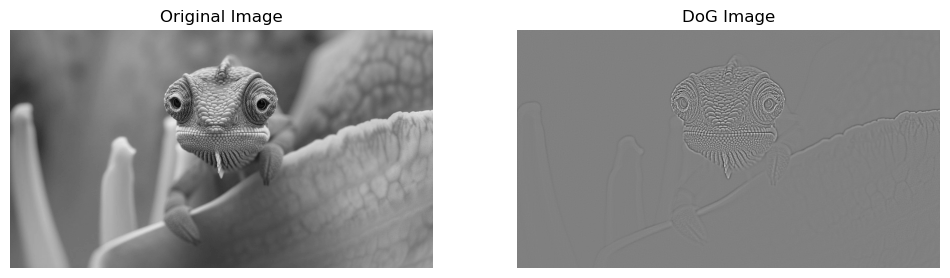

In [4]:
# Define DoG Function
def difference_of_gaussians(image, sigma1, sigma2):
    """
    Computes the Difference of Gaussians (DoG) for a given input image.
    
    Parameters:
    - image: Input image (2D array)
    - sigma1: Standard deviation for the first Gaussian kernel
    - sigma2: Standard deviation for the second Gaussian kernel
    
    Returns:
    - DoG image (2D array)
    """
    # Apply Gaussian filter with sigma1
    gaussian1 = gaussian_filter(image, sigma=sigma1)
    
    # Apply Gaussian filter with sigma2
    gaussian2 = gaussian_filter(image, sigma=sigma2)
    
    # Compute the Difference of Gaussians
    dog_image = gaussian1 - gaussian2
    
    return dog_image

# Example usage
image = color.rgb2gray(io.imread('images/image1.png'))  # Load and convert image to grayscale
sigma1 = 1.0
sigma2 = 2.0
dog_image = difference_of_gaussians(image, sigma1, sigma2)

# Display the original and DoG images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('DoG Image')
plt.imshow(dog_image, cmap='gray')
plt.axis('off')

plt.show()

# Load and Preprocess Images
Load the input images and preprocess them as needed (e.g., convert to grayscale).

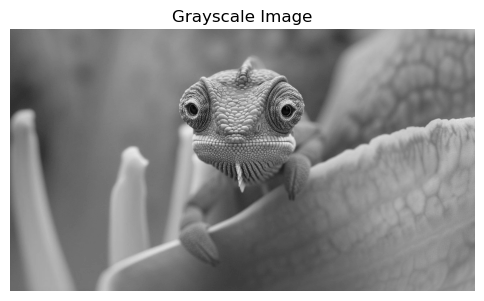

In [5]:
# Load and Preprocess Images
from skimage import io, color

def load_and_preprocess_image(image_path):
    """
    Loads an image from the specified path and converts it to grayscale.
    
    Parameters:
    - image_path: Path to the input image
    
    Returns:
    - Grayscale image (2D array)
    """
    image = io.imread(image_path)  # Load the image
    grayscale_image = color.rgb2gray(image)  # Convert to grayscale
    return grayscale_image

# Example usage
image_path = 'images/image1.png'
grayscale_image = load_and_preprocess_image(image_path)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.title('Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

# Apply DoG to Images
Apply the DoG function to the images with different scales.

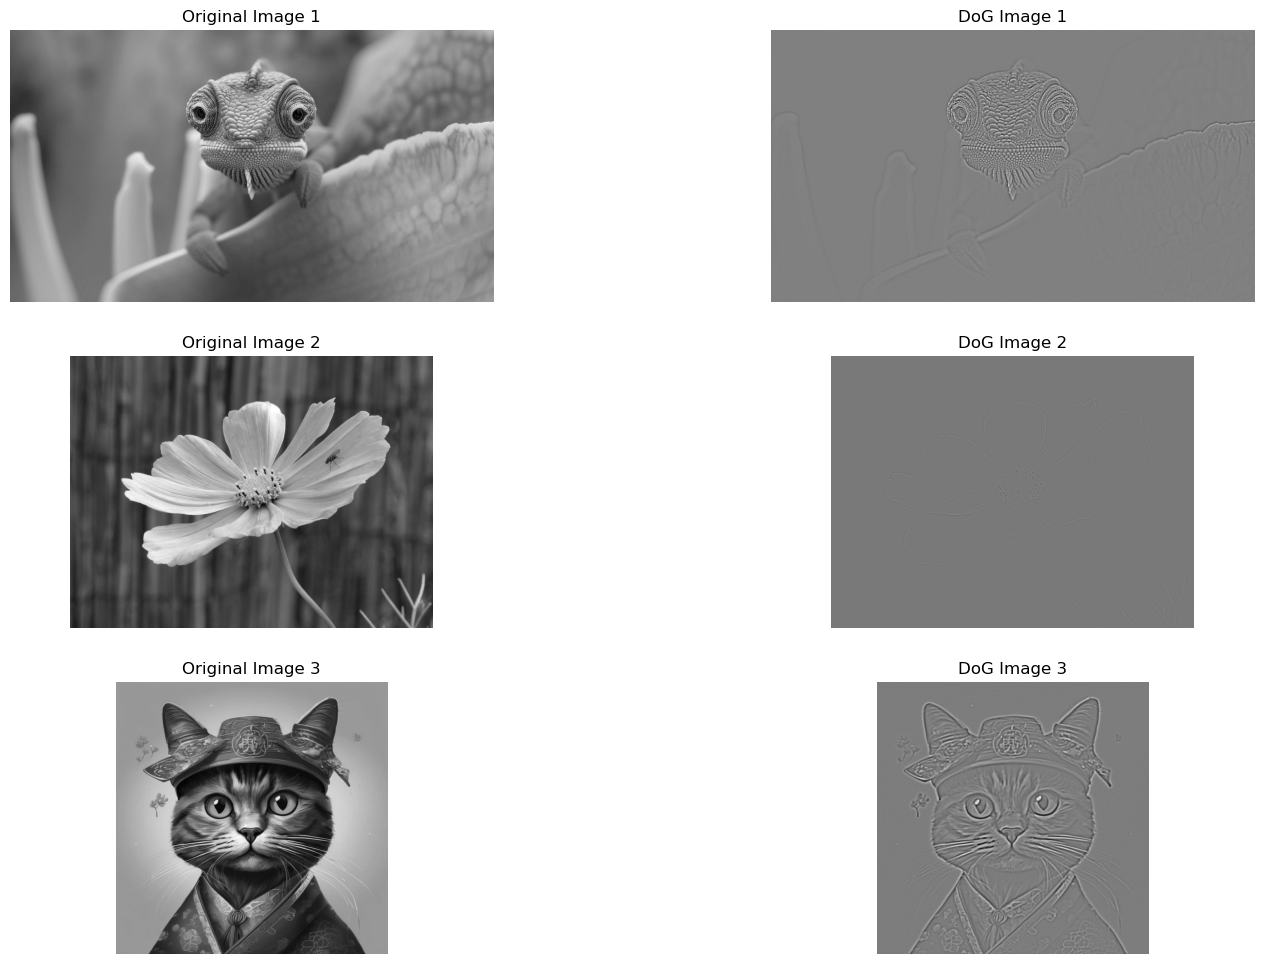

In [7]:
# Apply DoG to Images

# Define a function to apply DoG to multiple images with different scales
def apply_dog_to_images(image_paths, sigma1, sigma2):
    """
    Applies the Difference of Gaussians (DoG) to a list of images with specified scales.
    
    Parameters:
    - image_paths: List of paths to input images
    - sigma1: Standard deviation for the first Gaussian kernel
    - sigma2: Standard deviation for the second Gaussian kernel
    
    Returns:
    - List of DoG images
    """
    dog_images = []
    for path in image_paths:
        image = load_and_preprocess_image(path)  # Load and preprocess the image
        dog_image = difference_of_gaussians(image, sigma1, sigma2)  # Apply DoG
        dog_images.append(dog_image)
    return dog_images

# Example usage
image_paths = ['images/image1.png', 'images/image2.png', 'images/image3.png']
sigma1 = 1.0
sigma2 = 2.0
dog_images = apply_dog_to_images(image_paths, sigma1, sigma2)

# Display the original and DoG images for each input image
plt.figure(figsize=(18, 12))
for i, path in enumerate(image_paths):
    image = load_and_preprocess_image(path)
    
    plt.subplot(len(image_paths), 2, 2*i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(len(image_paths), 2, 2*i + 2)
    plt.title(f'DoG Image {i+1}')
    plt.imshow(dog_images[i], cmap='gray')
    plt.axis('off')

plt.show()

# Visualize Results
Visualize the original and DoG-processed images to observe the effect of scale.

In [ ]:
# Visualize Results

# Display the original and DoG images for each input image
plt.figure(figsize=(18, 12))
for i, path in enumerate(image_paths):
    image = load_and_preprocess_image(path)
    
    plt.subplot(len(image_paths), 2, 2*i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(len(image_paths), 2, 2*i + 2)
    plt.title(f'DoG Image {i+1}')
    plt.imshow(dog_images[i], cmap='gray')
    plt.axis('off')

plt.show()